In [1]:
from TrainingFunctions import loss_fn
from TransformerModules import Transformer, NonDirectionalTransformer, PTC
from Preconditioner import transformer, non_direc_transformer, ptc
from Operators import D_WC
from GMRES import gmres
import torch.nn as nn
from BasicFunctions import *

> Testing with Random input

In [2]:
x_rand = torch.rand(NUM_OF_LATTICES, *LATTICE, GAUGE_DOF, NON_GAUGE_DOF, dtype=torch.complex64)

In [3]:
x_rand_small = torch.rand(NUM_OF_LATTICES, *LATTICE_SMALL, GAUGE_DOF, NON_GAUGE_DOF, dtype=torch.complex64)

> Transformer Calculation Times

In [5]:
M = Transformer(GAUGE_FIELD, NON_GAUGE_DOF, 16, True, show_time=True)

PE in: 4.383 ms
DirectionBasedLinear in: 20.798 ms
SuperGaugeField in: 1524.428 ms
Transformer in: 1556.114 ms


In [6]:
test = M(x_rand, show_time=True)

Queries Keys in: 3.567 ms
Values in: 1821.602 ms
MltiHeadTr(dagger(q) q dagger(k) k) in: 17.616 ms
Scaling SGF in: 1787.338 ms
Activation in: 1810.874 ms
Transforming and Adding Values in: 6711.867 ms
Everything in: 10456.587 ms


In [7]:
M_small = Transformer(GAUGE_FIELD_SMALL, NON_GAUGE_DOF, 16, True, show_time=True)

PE in: 2.936 ms
DirectionBasedLinear in: 2.533 ms
SuperGaugeField in: 14.263 ms
Transformer in: 21.735 ms


In [8]:
test_small = M_small(x_rand_small, show_time=True)

Queries Keys in: 3.855 ms
Values in: 3.457 ms
MltiHeadTr(dagger(q) q dagger(k) k) in: 1.966 ms
Scaling SGF in: 1.032 ms
Activation in: 3.963 ms
Transforming and Adding Values in: 0.824 ms
Everything in: 14.215 ms


> PTC Calculation Times

In [11]:
start_time = time.time()
ptc = PTC(NON_GAUGE_DOF, NON_GAUGE_DOF, PTC_PATHES, GAUGE_FIELD)
end_time = time.time()
execution_time = end_time - start_time
print(f"PTC in: {execution_time*1e3:.3f} ms")

PTC in: 1.687 ms


In [12]:
start_time = time.time()
ptc(x_rand)
end_time = time.time()
execution_time = end_time - start_time
print(f"Calculation in: {execution_time*1e3:.3f} ms")

Calculation in: 18.407 ms


> What does my Transformer with a field ???

In [2]:
M = Transformer(GAUGE_FIELD_SMALL, NON_GAUGE_DOF, 16, True)

In [4]:
M = non_direc_transformer("non_direc_tr_4_16_True")

In [2]:
M = transformer("tr_gmres_4_16_True")

Attention Matrix:
 tensor([[3.4884e-03, 1.1222e-02, 1.5841e-02, 9.1635e-03, 2.4653e-03, 5.4662e-04,
         3.0781e-04, 6.1525e-04],
        [1.3979e-02, 5.2179e-02, 8.0868e-02, 5.3298e-02, 1.7515e-02, 4.7805e-03,
         2.6819e-03, 4.9177e-03],
        [2.4180e-03, 9.6856e-03, 1.6544e-02, 1.1031e-02, 3.5146e-03, 8.9474e-04,
         4.6455e-04, 8.0649e-04],
        [8.0915e-04, 2.6949e-03, 4.3112e-03, 2.7461e-03, 7.7827e-04, 1.7226e-04,
         9.1184e-05, 1.6888e-04]], grad_fn=<SelectBackward0>)


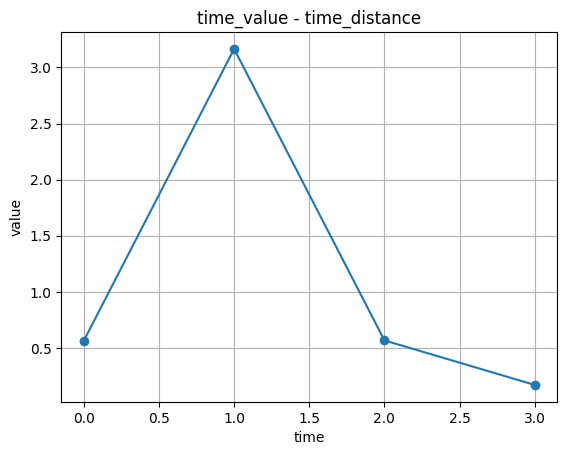

In [5]:
import matplotlib.pyplot as plt

x_one = torch.zeros(1, *LATTICE_SMALL, GAUGE_DOF, NON_GAUGE_DOF, dtype=torch.complex64)
one = torch.ones(GAUGE_DOF, NON_GAUGE_DOF)
x_one[0, 0, 0, 1, 2] = one

x_out = M(x_one)
time_values = []
for k in range(x_out.shape[3]):
    time_values.append(torch.sum(torch.abs(x_out[0,0,0,k,2]), dim=(-2,-1)).item())
time_spots = list(range(x_out.shape[3]))

plt.plot(time_spots, time_values, "o-")
plt.xlabel('time')
plt.ylabel('value')
plt.title("time_value - time_distance")
plt.grid(True)
plt.show()

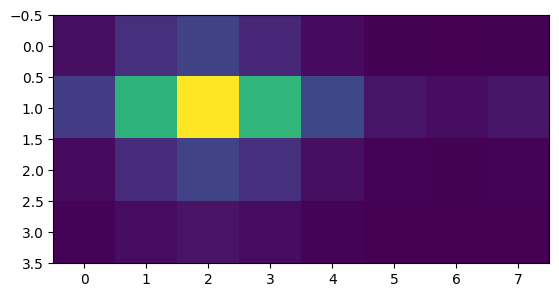

In [7]:
plt.imshow([[3.4884e-03, 1.1222e-02, 1.5841e-02, 9.1635e-03, 2.4653e-03, 5.4662e-04,
         3.0781e-04, 6.1525e-04],
        [1.3979e-02, 5.2179e-02, 8.0868e-02, 5.3298e-02, 1.7515e-02, 4.7805e-03,
         2.6819e-03, 4.9177e-03],
        [2.4180e-03, 9.6856e-03, 1.6544e-02, 1.1031e-02, 3.5146e-03, 8.9474e-04,
         4.6455e-04, 8.0649e-04],
        [8.0915e-04, 2.6949e-03, 4.3112e-03, 2.7461e-03, 7.7827e-04, 1.7226e-04,
         9.1184e-05, 1.6888e-04]])